In [34]:
import numpy as np
import matplotlib.pyplot as plt

rand:
Generates random numbers from a uniform distribution over the interval [0, 1].

randn:
Generates random numbers from a standard normal distribution with mean 0 and standard deviation 1.

Generating some data to test these equations.

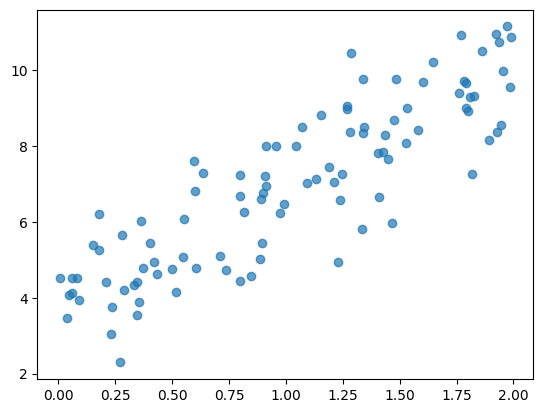

array([ 9.68628315,  4.78906432,  4.57734464,  8.29600623,  7.25171552,
       10.8711696 ,  6.2542988 ,  3.47329795,  4.14233823,  2.29287861,
        5.03184383,  4.51820578,  6.65569433,  7.02341107,  7.99652545,
        4.43950254,  9.07180968,  7.27794088,  5.44436816, 10.92800923,
        4.34722469,  8.50854973,  4.53186754,  6.77573524,  5.80254735,
        8.0062178 ,  8.82530602,  9.40107122,  4.95537366,  8.96930456,
        7.3010556 ,  8.08868873,  9.00857102,  7.8383162 ,  3.76359051,
        6.46863979,  7.65867812,  6.61578751,  7.61272475,  6.02762538,
        5.25443211,  9.78044859,  4.77232346,  5.38887195,  9.77205469,
        6.24666888,  5.45075543,  9.3288132 ,  7.46106762,  8.9205648 ,
       10.21779253,  7.20483921,  9.67875891,  5.66512918,  9.71720053,
        5.96593326,  8.37848275,  8.41841059,  9.5573143 ,  4.07235284,
        5.0874316 ,  6.2050567 ,  8.3847477 ,  9.01377796,  7.80916092,
        4.78489846,  6.6894132 ,  8.57083838,  3.93283684,  3.88

In [35]:
X = 2*np.random.rand(100,1)
Y = 4+3*X+np.random.randn(100,1)
plt.scatter(X,Y,alpha = 0.7)
plt.show()
Y.ravel()

**Θ = ((XᵀX)^-1)XᵀY**
Now computing the Theta using the normal equation

In [36]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
X_b
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best
# function used to generate the data is y = 4+3x1+Gaussian noise

array([[3.75140051],
       [3.14662179]])

although we hoped for Θ = 4 and Θ1 = 3 we instead got 4.07 and 3.23. The noise made it impossible to recover the exact parameters of the original function

In [37]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.75140051],
       [10.04464409]])

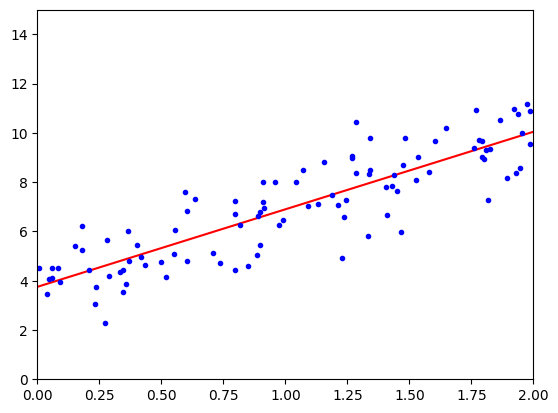

In [38]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,Y,'b.')
plt.axis([0,2,0,15]) #axis([xmin, xmax, ymin, ymax])
plt.show()

performing Linear regression using Scikit-Learn

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.intercept_, lin_reg.coef_

(array([3.75140051]), array([[3.14662179]]))

In [53]:
lin_reg.predict(X_new)

array([[ 3.75140051],
       [10.04464409]])

In [60]:
y_p = np.add(X_new.dot(lin_reg.coef_),lin_reg.intercept_)
y_p

array([[ 3.75140051],
       [10.04464409]])

In [42]:
# you can also use np.linalg.pinv() to compute the pseudoinverse directly
np.linalg.pinv(X_b).dot(Y)

array([[3.75140051],
       [3.14662179]])

# Batch Gradient Descent

array([[3.40525751],
       [3.3891442 ]])

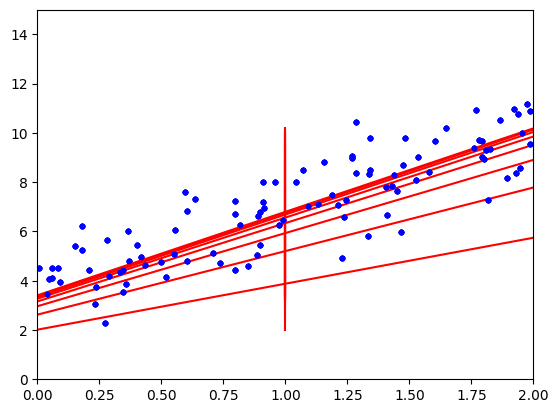

In [43]:
#eta = 0.2 #learning rate
n_iteration = 10
m = 100
theta = np.random.randn(2,1) #random initilization
eta = 0.1
plt.plot(Y,X,'b.')
plt.axis([0,2,0,15])
for i in range(2,n_iteration):
  gradient = (2/m)*X_b.T.dot(X_b.dot(theta)-Y)
  theta = theta-eta*gradient
  y_predict1 = X_new_b.dot(theta)
  plt.plot(X_new_b,y_predict1,'r-')
  plt.plot(X,Y,'b.')
theta

Choosing the ideal no of iteration is ideal. If its too low, you will still be far away from the optimal solution but if its to high your will waste time.

A simple solution is to set very large no of iterations but to intrupt the algorithm when the gradient becomes very tiny- that is when norm becomes smaller than a tiny number C called tolerance

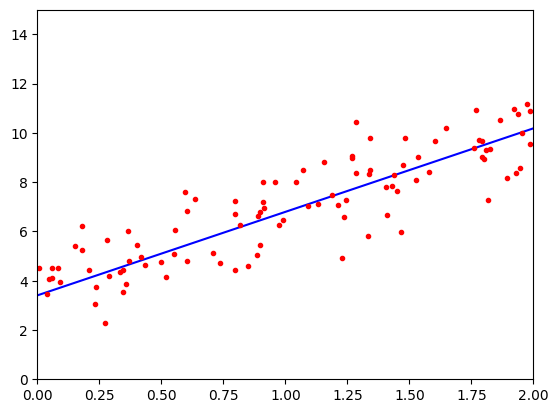

In [44]:
y_predict1 = X_new_b.dot(theta)
plt.plot(X_new,y_predict1,'b-')
plt.axis([0,2,0,15])
plt.plot(X,Y,'r.')

array([[3.79653801],
       [3.15008387]])

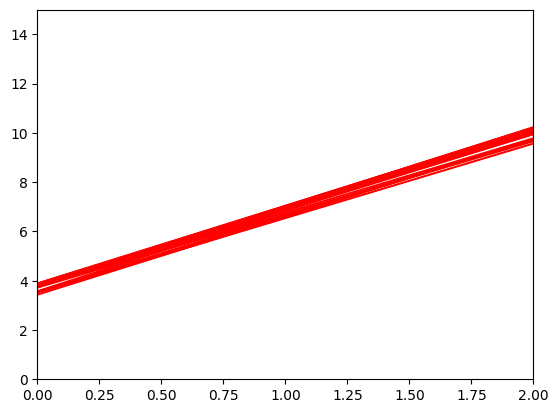

In [48]:
n_epoch = 50
t0,t1 = 5,50 #Learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t+t1)
thetaa = np.random.randn(2,1) #initiliazing theta
plt.axis([0,2,0,15])
for epoch in range(n_epoch):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = Y[random_index:random_index+1]
    gradient = 2*xi.T.dot(xi.dot(thetaa)-yi)
    eta = learning_schedule(epoch*m+i)
    thetaa = thetaa-eta*gradient
  y_predict2 = X_new_b.dot(thetaa)
  plt.plot(X_new,y_predict2,'r-')
thetaa

To perform Linear regression using Stochastic GD with skicit learn you need to use **SGDRegressor** class, which defaults to optimizating the square error class. The following code runs for a maximum of 1000 epochs until the loss drops by less than 0.001 during one epochs. It starts with a learning rate of 0.1


In [46]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter =1000,loss = 'squared_error',penalty = None,tol = 0.001,eta0 = 0.1)
sgd_reg.fit(X,Y.ravel()) # The fit function of SGDRegressor expects x to be of dimentions (m,n) where m is the number of training examples and n is the number of features
# SGDRegressor expects Y to be a 1D array with shape (m,) since Y here is in the sape of (m,1) Y.ravel() will flatten the shape to !D array
sgd_reg.intercept_, sgd_reg.coef_

(array([3.78385631]), array([3.18758643]))